In [4]:
%pip install openai requests pillow --quiet

Note: you may need to restart the kernel to use updated packages.


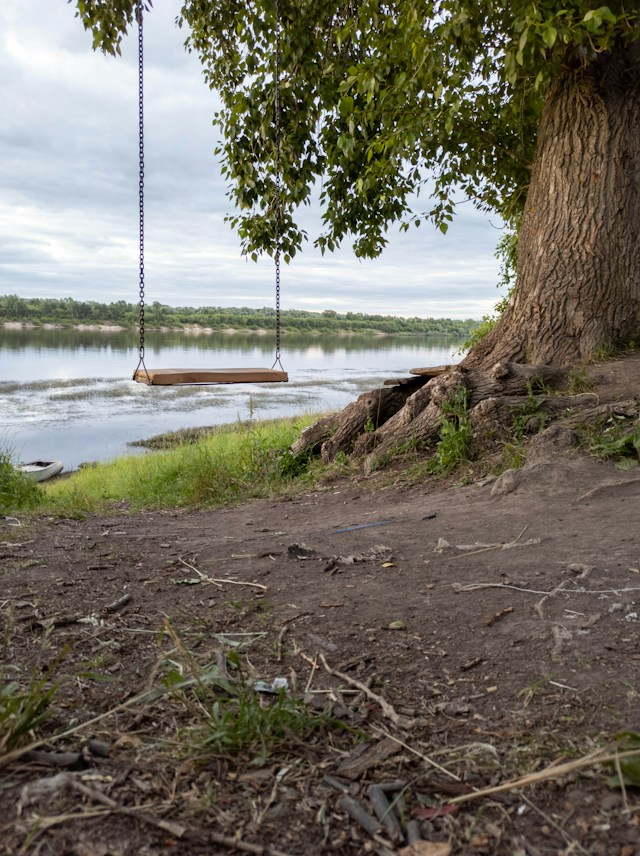

In [7]:
import requests
from PIL import Image 
import os

# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'downloaded_image.jpg')

# Retrieve the generated image
generated_image = requests.get("https://images.unsplash.com/photo-1593466144596-8abd50ad2c52?ixlib=rb-4.0.3&q=85&fm=jpg&crop=entropy&cs=srgb&dl=andrew-reshetov-yP57S4OhBgI-unsplash.jpg&w=640").content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

  
img = Image.open(image_path) 
img.show()

In [10]:
from openai import AzureOpenAI
import os
from dotenv import load_dotenv
load_dotenv()

deployment_name = "gpt-4-vision-preview"

client = AzureOpenAI(
    api_version='2023-12-01-preview',
    api_key=os.getenv("AZURE_OPENAI_KEY"),  
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
)

response = client.chat.completions.create(
    model=deployment_name,
    messages=[
        { "role": "system", "content": "You are a helpful assistant." },
        { "role": "user", "content": [  
            { 
                "type": "text", 
                "text": "Describe this picture:" 
            },
            { 
                "type": "image_url",
                "image_url": {
                    "url": "https://images.unsplash.com/photo-1593466144596-8abd50ad2c52?ixlib=rb-4.0.3&q=85&fm=jpg&crop=entropy&cs=srgb&dl=andrew-reshetov-yP57S4OhBgI-unsplash.jpg&w=640"
                }
            }
        ] } 
    ],
    max_tokens=2000 
)

print(response.choices[0].message.content)

You are looking at an outdoor scene that includes a river, a large tree, and a swing. The swing, which has a simple flat seat and is suspended on metal chains, is hanging from a sturdy branch of the tree. The tree is positioned on the bank of the river, with its extensive roots partially exposed at the base, giving evidence of soil erosion. The ground is mostly bare with some scattered debris and greenery indicating it's a natural, possibly a little neglected riverside area. The view across the river shows a tranquil expanse of water with greenery on the far shore under a cloudy sky. The scene has a calm and somewhat rustic feel.
